# 從股票學python

## namedtuple

In [1]:
date_array = ['20170118','20170119','20170120','20170121','20170122']
price_array = ['30.14','29.58','26.36','32.56','32.82']

In [2]:
from collections import namedtuple

stock_namedtuple = namedtuple('stock',('date','price'))

In [3]:
stock_namedtuple

__main__.stock

In [4]:
stock_namedtuple_list = [stock_namedtuple(date,price) for date,price 
                        in zip(date_array,price_array)]

In [5]:
stock_namedtuple_list[0]

stock(date='20170118', price='30.14')

In [6]:
# namedtuple()

# dict

In [7]:
stock_dict = {
    date:price for date,price in zip(date_array,price_array)
}

In [8]:
stock_dict

{'20170118': '30.14',
 '20170119': '29.58',
 '20170120': '26.36',
 '20170121': '32.56',
 '20170122': '32.82'}

In [9]:
stock_dict.keys()

dict_keys(['20170118', '20170119', '20170120', '20170121', '20170122'])

In [10]:
## ordered dict
from collections import OrderedDict
stock_dict = OrderedDict(
    (date,price) for date,price in zip(date_array, price_array)
)

In [11]:
stock_dict.keys()

odict_keys(['20170118', '20170119', '20170120', '20170121', '20170122'])

# function
1. built-in
2. lambda 
3. `map`,`reduce`,`filter`
4. partial

In [12]:
xx = map(lambda x:x**2, range(10)) ## return iter object
[e for e in xx]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [13]:
min(stock_dict)

'20170118'

In [14]:
min(zip(stock_dict.values(), stock_dict.keys()))

('26.36', '20170120')

In [15]:
def find_second_max(dict_array):
    stock_prices_sorted = sorted(
        zip(dict_array.values(), dict_array.keys()))
    return stock_prices_sorted[-2]

if callable(find_second_max):
    print(find_second_max(stock_dict))

('32.56', '20170121')


In [16]:
## sort dict by value 
import operator
sorted_dict = sorted(stock_dict.items(), key = operator.itemgetter(1))

In [17]:
sorted_dict

[('20170120', '26.36'),
 ('20170119', '29.58'),
 ('20170118', '30.14'),
 ('20170121', '32.56'),
 ('20170122', '32.82')]

- `map`
- `filter`
- `reduce`(no longer in python3)

In [18]:
price_float_array = [float(price_str) for price_str in stock_dict.values()]
pp_array = [
    (price1,price2) for price1,price2 in zip(price_float_array[:-1],price_float_array[1:])
]

In [19]:
change_array = list(map(lambda e:round((e[1]-e[0])/e[0],3) ,pp_array))
change_array.insert(0,0)

In [20]:
change_array

[0, -0.019, -0.109, 0.235, 0.008]

In [21]:
stock_namedtuple = namedtuple('stock', ('date','price','change'))
stock_dict = OrderedDict((date,stock_namedtuple(date, price, change)) for date, price, change in 
zip(date_array,price_array,change_array))

In [22]:
up_days = list(filter(lambda day:day.change>0, stock_dict.values()))

In [23]:
def filter_stock(stock_array_dict, want_up = True,
                want_calc_sum = False):
    if not isinstance(stock_array_dict, OrderedDict):
        raise TypeError('stock_array_dict must be OrderedDict!')
    filter_func = (lambda day:day.change > 0 ) \
        if want_up else (lambda day:day.change < 0 )
    want_days = filter(filter_func, stock_array_dict.values())
    
    if not want_calc_sum:
        return want_days
    
    change_sum = 0.0 
    for day in want_days:
        change_sum += day.change
    return change_sum

In [24]:
want_days = filter_stock(stock_dict,want_up = False)
for day in want_days:
    print(day.change)

-0.019
-0.109


In [25]:
print('上漲交易日的漲幅和:{}'.format(filter_stock(stock_dict,want_calc_sum=True)))

上漲交易日的漲幅和:0.243


In [26]:
print('上漲日:{}'.format(list(filter(lambda day:day.change >0, stock_dict.values()))))

上漲日:[stock(date='20170121', price='32.56', change=0.235), stock(date='20170122', price='32.82', change=0.008)]


In [27]:
from functools import partial

In [28]:
filter_stock_up_days = partial(filter_stock,want_up=True,want_calc_sum=False)
filter_stock_down_days = partial(filter_stock,want_up=False,want_calc_sum=False)
filter_stock_up_sums = partial(filter_stock,want_up=True,want_calc_sum=True)
filter_stock_down_sums = partial(filter_stock,want_up=False,want_calc_sum=True)
print('上漲日:\n{}'.format(list(filter_stock_up_days(stock_dict))))
print('下跌日:\n{}'.format(list(filter_stock_down_days(stock_dict))))


上漲日:
[stock(date='20170121', price='32.56', change=0.235), stock(date='20170122', price='32.82', change=0.008)]
下跌日:
[stock(date='20170119', price='29.58', change=-0.019), stock(date='20170120', price='26.36', change=-0.109)]


# OO

In [29]:
from collections import namedtuple
from collections import OrderedDict

['20170118', '20170119', '20170120', '20170121', '20170122']

In [64]:
class StockTradeDays:
    def __init__(self, price_array, start_date, date_array = None):
        ## private price array
        self.__price_array = price_array
        ## private date array
        self.__date_array = self._init_days(start_date, date_array)
        ## private stock change array
        self.__change_array = self.__init_change()
        ## Ordered Dict 
        self.stock_dict = self._init_stock_dict()
    
    def __init_change(self):
        """從price array生成change_array
        """
        price_float_array = [float(price_str) for price_str in 
                             self.__price_array]
        # 通過平移將錯開的收盤價格序列透過zip打包,每個元素為相鄰的兩個收盤價
        pp_array = [(price1,price2) for price1,price2 in 
                   zip(price_float_array[:-1],price_float_array[1:])]
        
        change_array = list(
            map(lambda e:round((e[1]-e[0])/e[0],3) ,pp_array)
        )        
        change_array.insert(0,0)
        return change_array
    
    def _init_days(self, start_date, date_array):
        """protect方法
        start_date : 初始日期
        date_array : 給定日期序列
        """
        if date_array is None:
            ## 簡易（不正確?)由start_date & self.__price_array來確定日期序列
            date_array = [str(start_date + ind) for ind, _ in 
                         enumerate(self.__price_array)]
        else:
            date_array = [str(date) for date in date_array]
        return date_array
    def print_private(self):
        print('date_array:{},\nprice_array:{},\nchange_array:{}'.format(
            self.__date_array,self.__price_array,self.__change_array))
    def _init_stock_dict(self):
        """使用namedtuple, OrderDict將結果合併
        """
        stock_namedtuple = namedtuple('stock',
                                      ('date','price','change'))
        
        stock_dict = OrderedDict(
            (date,stock_namedtuple(date, price, change)) 
            for date, price, change in 
            zip(self.__date_array, self.__price_array, 
                self.__change_array)
        )
                
        return stock_dict
    
    def filter_stock(self, want_up=True, want_calc_sum=False):
        """篩選結果子集
        params
        ======
        want_up : 是否上漲
        want_calc_sum : 是否計算漲幅
        """
        filter_func = (lambda day:day.change >0) if want_up else (
            lambda day:day.change<0)
        want_days = filter(filter_func, self.stock_dict.values())
        
        if not want_calc_sum:
            return want_days
        ## 計算漲幅
        change_sum = 0.0 
        for day in want_days:
            change_sum += day.change
            
        return change_sum
            
    def __str__(self):
        return str(self.stock_dict)
        
    __repr__  = __str__
    
    def __iter__(self):
        for key in self.stock_dict:
            yield self.stock_dict[key]
        
    
    def __getitem__(self,ind):
        date_key = self.__date_array[ind]
        return self.stock_dict[date_key]
    
    def __len__(self):
        return len(self.stock_dict)
    
        

In [77]:
trade_days = StockTradeDays(price_array,20170101)
print(trade_days)
trade_days

OrderedDict([('20170101', stock(date='20170101', price='30.14', change=0)), ('20170102', stock(date='20170102', price='29.58', change=-0.019)), ('20170103', stock(date='20170103', price='26.36', change=-0.109)), ('20170104', stock(date='20170104', price='32.56', change=0.235)), ('20170105', stock(date='20170105', price='32.82', change=0.008))])


OrderedDict([('20170101', stock(date='20170101', price='30.14', change=0)), ('20170102', stock(date='20170102', price='29.58', change=-0.019)), ('20170103', stock(date='20170103', price='26.36', change=-0.109)), ('20170104', stock(date='20170104', price='32.56', change=0.235)), ('20170105', stock(date='20170105', price='32.82', change=0.008))])

In [79]:
from collections import Iterable
if isinstance(trade_days,Iterable):
    for e in trade_days:
        print(e)

stock(date='20170101', price='30.14', change=0)
stock(date='20170102', price='29.58', change=-0.019)
stock(date='20170103', price='26.36', change=-0.109)
stock(date='20170104', price='32.56', change=0.235)
stock(date='20170105', price='32.82', change=0.008)


In [81]:
list(trade_days.filter_stock())

[stock(date='20170104', price='32.56', change=0.235),
 stock(date='20170105', price='32.82', change=0.008)]

In [82]:
trade_days[-1]

stock(date='20170105', price='32.82', change=0.008)

# 繼承

通過ABC實現抽象類別,並且透過類型檢查來確定子類別實現了特定的方法

In [85]:
from abc import ABCMeta, abstractmethod

In [86]:
class TradeStrategyBase(metaclass=ABCMeta):
    """
    交易策略的抽象類別
    """
    @abstractmethod
    def buy_strategy(self, *args, **kwargs):
        pass
    @abstractmethod
    def sell_strategy(self, *args, **kwargs):
        pass

In [87]:
class TradeStrategy1(TradeStrategyBase):
    """
    交易策略1 : 
    =========
    追漲策略,當股價上漲一個閥值（預設7%)
    買入並持有s_keep_stock_threshold(20)天
    """
    s_keep_stock_threshold = 20
    def __init__(self):
        self.keep_stock_day = 0 
        ## 7%漲幅作為買入策略的閥值
        self.__buy_change_threshold = 0.07
        
    def buy_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day == 0 and \
            trade_day.change > self.__buy_change_threshold :
                ## 如果上漲超過幅度，並且沒有持有則買入
                self.keep_stock_day += 1
        elif self.keep_stock_day > 0:
            ## 持有股票,持有股票時間遞增
            self.keep_stock_day +=1
            
    def sell_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day >= \
            TradeStrategy1.s_keep_stock_threshold:
                ## 若持有股票天數 > 閥值 s_keep_stock_threshold 則賣出
                self.keep_stock_day = 0 
    
    @property
    def buy_change_threshold(self):
        return self.__buy_change_threshold
    
    @buy_change_threshold.setter
    def buy_change_threshold(self, buy_change_threshold):
        if not isinstance(buy_change_threshold, float):
            raise TypeError('buy change threshold must be float!')
        self.__buy_change_threshold = round(buy_change_threshold,2)
    

In [92]:
class TradeLoopBack:
    """回測"""
    def __init__(self, trade_days, trade_strategy):
        """
        使用前面封裝的StockTradeDays和交易策略TradeStrategy
        params
        ======
        trade_days : StockTradeDays 交易數據序列
        trade_strategy : TradeStrategyBase 交易策略
        """
        self.trade_days = trade_days
        self.trade_strategy = trade_strategy 
        ## 交易盈虧序列
        self.profit_array = []
        
    def execute_trade(self):
        """執行交易回測"""
        for ind,day in enumerate(self.trade_days):
            """以時間驅動,完成交易回測"""
            if self.trade_strategy.keep_stock_day > 0:
                ## 如果持有股票,加入交易盈虧結果序列
                self.profit_array.append(day.change)
            #hasattr : 查詢object是否有實現某個方法
            if hasattr(self.trade_strategy, 'buy_strategy'):
                ## 買入策略
                self.trade_strategy.buy_strategy(ind, day, 
                                                 self.trade_days)
            if hasattr(self.trade_strategy, 'sell_strategy'):
                ## 賣出策略
                self.trade_strategy.sell_strategy(ind, day,
                                                 self.trade_days)

In [93]:
trade_loop_back = TradeLoopBack(trade_days,TradeStrategy1())

In [94]:
trade_loop_back.execute_trade()

In [96]:
from functools import reduce

In [97]:
reduce(lambda a,b: a+b,trade_loop_back.profit_array)

0.008

In [115]:
class TradeStrategy2(TradeStrategyBase):
    """
    交易策略2:
    ========
    均值回復策略當股價連續兩個交易日下跌,
    且下跌幅度超過默認 s_buy_change_threshold(-10%)
    買入並持有 s_keep_stock_threshold(10)天
    """
    s_keep_stock_threshold = 10 #買入後持有N天
    s_buy_change_threshold = -0.10 #下跌買入閥值
    def __init__(self):
        self.keep_stock_day = 0
    def buy_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day == 0 and trade_ind >= 1:
            """
            當沒有持有股票的時候self.keep_stock_day == 0 並且
            trade_ind >= 1, 不是交易開始的第一天, 因為需要前一天數據
            """
            # trade_day.change < 0 bool:今天股價是否下跌
            today_down = trade_day.change < 0 
            yesterday_down = trade_days[trade_ind - 1].change < 0 
            down_rate = trade_day.change + \
                trade_days[trade_ind - 1].change
            if today_down and yesterday_down and down_rate < \
                TradeStrategy2.s_buy_change_threshold:
                    # 買入條件成立
                    self.keep_stock_day += 1
        elif self.keep_stock_day > 0 :
            # 代表持有股票,持有日數增加
            self.keep_stock_day += 1
    
    def sell_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day >= \
            TradeStrategy2.s_keep_stock_threshold:
                self.keep_stock_day = 0
    @classmethod
    def set_keep_stock_threshold(cls, keep_stock_threshold):
        cls.s_keep_stock_threshold = keep_stock_threshold
    @staticmethod
    def set_buy_change_threshold(buy_change_threshold):
        TradeStrategy2.s_buy_change_threshold = buy_change_threshold

In [116]:
trade_strategy2 = TradeStrategy2()

In [117]:
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)

In [119]:
trade_loop_back.execute_trade()
trade_loop_back.profit_array

[0.235, 0.008, 0, -0.019, -0.109, 0.235, 0.008]

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline 

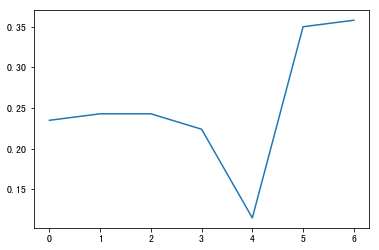

In [125]:
plt.plot(np.array(trade_loop_back.profit_array).cumsum())

In [126]:
trade_strategy2 = TradeStrategy2()
TradeStrategy2.set_keep_stock_threshold(20)
TradeStrategy2.set_buy_change_threshold(-0.08)

In [127]:
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)

In [128]:
trade_loop_back.execute_trade()

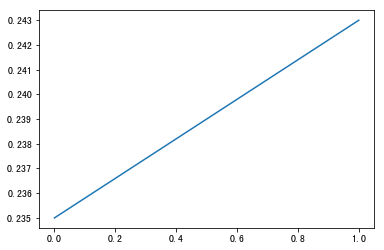

In [134]:
plt.plot(np.array(trade_loop_back.profit_array).cumsum())